# Neural Network

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler

## Data Integration

In [3]:
# sorting data & predictors
db = pd.read_csv("diabetes_012_health_indicators_BRFSS2015.csv")
db.drop_duplicates(inplace = True)

In [4]:
db = db[db["Diabetes_012"] != 1] # drop prediabetes
db['Diabetes_012'] = db['Diabetes_012'].replace(2,1)

i_keep_0 = db[db['Diabetes_012'] == 0].sample(n = db['Diabetes_012'].value_counts()[1],
                                   replace=False,
                                   random_state = 1).index

i_keep_all = db[db['Diabetes_012'] == 1].index.append(i_keep_0).sort_values()

db = db.loc[i_keep_all].reset_index(drop=True)

In [5]:
# subsetting predictors
db_main = db[['Diabetes_012', 'BMI', 'HighBP', 'HighChol', 'Sex', 'Age']]

## Model Building

In [6]:
x = db_main.drop('Diabetes_012', axis = 1)

scaler = MinMaxScaler(feature_range = (0, 1))
xresc = scaler.fit_transform(x)
x = pd.DataFrame(data = xresc, columns = x.columns)

y = db_main['Diabetes_012']

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.1, random_state = 1)

In [7]:
mlp = MLPClassifier(hidden_layer_sizes = (12, 3),
                    learning_rate_init = 0.001,
                    max_iter = 500,
                    activation = 'logistic',
                    solver = 'sgd',
                    batch_size = 100,
                    random_state = 1)

mlp.fit(xtrain, ytrain)
pred = mlp.predict(xtest)

In [8]:
print(f'Training MSE: {round(mean_squared_error(mlp.predict(xtrain), ytrain), 4)}')
print(f'Testing MSE: {round(mean_squared_error(pred, ytest), 4)}')

Training MSE: 0.2914
Testing MSE: 0.2926


In [9]:
print(classification_report(ytest, pred,
                            digits = 4,
                            target_names = ["No Diabetes", "Diabetes"],
                            zero_division = 1))

              precision    recall  f1-score   support

 No Diabetes     0.7409    0.6557    0.6957      3581
    Diabetes     0.6798    0.7613    0.7182      3439

    accuracy                         0.7074      7020
   macro avg     0.7104    0.7085    0.7070      7020
weighted avg     0.7110    0.7074    0.7067      7020



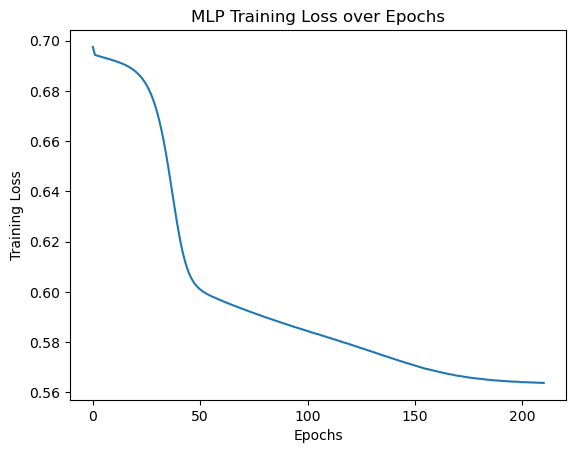

In [10]:
plt.plot(mlp.loss_curve_)
plt.title('MLP Training Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.show()

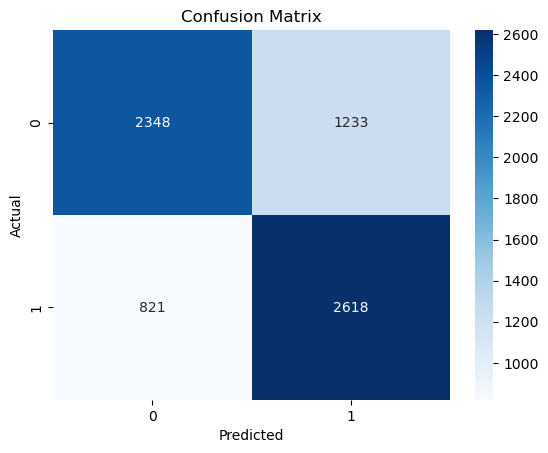

In [11]:
cm = confusion_matrix(ytest, pred)
sns.heatmap(cm, annot = True, fmt = "d", cmap = "Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()